In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Predict which features affect CO2 emission more

In [12]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


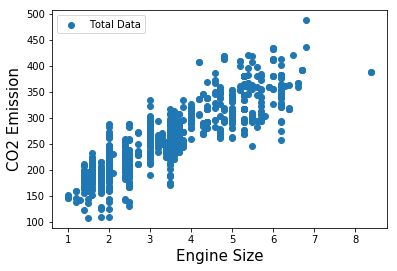

In [20]:
## Data Visualization
X = cdf.drop(['CO2EMISSIONS'],axis=1)
y = cdf.CO2EMISSIONS
plt.scatter(X.ENGINESIZE, y, label = 'Total Data')
plt.xlabel('Engine Size', size = 15)
plt.ylabel('CO2 Emission', size = 15)
plt.legend()

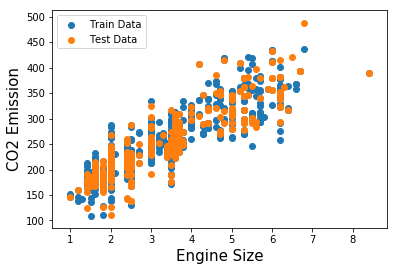

In [39]:
## Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.scatter(X_train.ENGINESIZE, y_train, label = 'Train Data')
plt.scatter(X_test.ENGINESIZE, y_test, label = 'Test Data')
plt.xlabel('Engine Size', size = 15)
plt.ylabel('CO2 Emission', size = 15)
plt.legend()

In [54]:
## Linear Regression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
LR.fit(X_train,y_train) # Linear Regression Model training; Minimize 'Ordinary Least Square' 
R2 = LR.score(X_test,y_test) # Prediction: using R^2
print('R-Squared Value: {}'.format(R2))
print('Coefficient of features: {}'.format(LR.coef_))

R-Squared Value: 0.8750879683794125
Coefficient of features: [11.50918569  6.97833913  9.52809078]


### Feature Importance: Engine Size > Fuel consumption_COMB > Cylinders

### Computing Cross-Validated Metrics
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, X, y, cv=10) # Based on KFold method
print(scores)
scores.mean()

[0.90979945 0.85380894 0.75480178 0.83031873 0.80932037 0.83242427
 0.87071561 0.89845402 0.91698713 0.8631755 ]


0.8539805787275169